#### Random Walk Generation in Python

The key features of this program are:
- Random Normal Distribution(s)
- Monte Carlo Simulation
- Geometric Brownian Motion
- Python code optimization (to make the GBM formula run faster)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Write a Python function to execute Geometric Brownian Motion (GBM)
def gbm_v1(s_0, n_years, mu, sigma, steps, n_sims=1000):
    """
    Evolution of an initial stock price using a Geometric Brownian Motion
    """
    dt = 1/steps #change in time
    n_steps = int(n_years*steps) #total number of time steps over the investment horizon
    xi = np.random.normal(size=(n_steps, n_sims)) #generate a matrix with as many rows as there are STEPS and as many columns as there are SIMULATIONS
    rets = mu*dt + sigma*np.sqrt(dt)*xi #calculate returns as per GBM formula
    rets[0] = 0 #run this line to make the first row of prices equal to s_0
    rets = pd.DataFrame(rets) #convert to data frame
    prices = s_0*(1+rets).cumprod() #convert to prices
    return prices #return the simulated evolution of stock prices as data frame

In [3]:
#Set parameters for Geometric Brownian Motion
    
s_0 = 100       #The initial stock price (at t=0)
n_years=10      #Holding period / investment horizon
mu=0.07         #Expected return assumption
sigma=0.15      #Volatility assumption

steps=12        #The time steps (discrete time intervals for x-axis)
n_sims=1000     #The number of simulations

In [4]:
#Stock price simulation as Data Frame
gbm_v1(s_0, n_years, mu, sigma, steps, n_sims)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,92.836307,102.640770,98.973580,108.953191,103.996677,104.682805,97.344907,100.622495,103.626169,101.916272,...,99.333241,98.363543,103.503515,97.163250,104.454628,102.509598,100.100699,103.988081,97.154831,100.163056
2,86.787560,107.866923,96.363007,115.096198,99.732939,107.610808,98.374685,110.788134,105.344620,102.748831,...,106.320495,96.047877,106.926424,97.071759,108.164266,97.644125,107.075594,98.152675,101.793939,96.634290
3,88.783980,116.780440,98.564575,116.536653,98.804579,117.624752,100.793436,114.795818,114.870895,99.350155,...,99.903869,94.138933,102.545399,99.635158,112.464012,103.074902,105.883844,94.129907,100.837323,93.647875
4,92.992789,124.855615,97.751924,117.164314,104.473861,112.045777,102.584914,111.735597,111.425460,103.730510,...,90.153295,92.335538,101.419241,102.368644,111.293968,105.620403,102.293064,90.136447,97.931844,92.426437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,371.382890,95.123287,253.081397,671.132200,97.492453,342.837309,131.399168,169.761779,92.311473,163.621233,...,181.790524,180.534846,190.298602,186.086981,158.403576,159.495960,141.380392,343.513198,132.151556,129.931055
116,370.011319,94.581271,277.566044,647.413117,104.084340,339.297554,130.331590,156.527257,101.911547,162.668632,...,186.769697,183.841959,187.211528,181.417622,152.163227,156.180399,136.915571,366.936596,128.529086,119.782838
117,369.612552,94.714011,272.584729,618.895235,100.125876,344.514437,133.566207,162.305745,101.816055,165.082038,...,186.095729,191.289609,176.981150,176.896799,152.146660,165.795839,126.274124,362.305406,130.427978,120.783139
118,368.335266,90.407150,277.881695,604.061634,103.561190,357.780638,135.233072,155.848040,94.074061,167.462830,...,173.146498,184.825049,168.623539,173.775577,143.729936,172.805910,141.306444,345.944968,140.587544,118.828299


<Axes: title={'center': 'Stock Price Simulation using gbm_v1()'}>

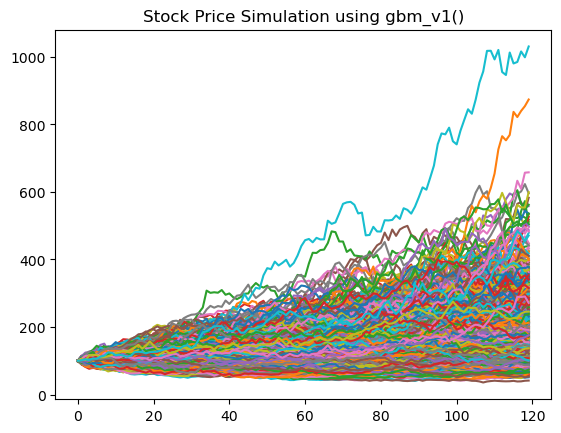

In [5]:
#Stock price simulation as plot
gbm_v1(s_0, n_years, mu, sigma, steps, n_sims).plot(legend=False, title="Stock Price Simulation using gbm_v1()")

Notice how there are at least two loop embedded in gbm_v1(), one corresponding to the xi matrix and another corresponding to s_0*(1+r). Let's see if we can use numpy and pandas to make Geometric Brownian Motion run faster:

In [6]:
#Write a more "Pythonic" version of the earlier function for Geometric Brownian Motion (GBM)
def gbm_v2(s_0, n_years, mu, sigma, steps, n_sims=1000):
    """
    Evolution of an initial stock price using a Geometric Brownian Motion
    """
    dt = 1/steps
    n_steps = int(n_years*steps)
    rets = np.random.normal(loc=1+mu*dt, scale=sigma*np.sqrt(dt), size=(n_steps, n_sims))   #1) center the Random Normal Distribution at 1+mu*dt by adding the "loc=" argument to np.random.normal()
                                                                                            #2) apply the sigma*np.sqrt(dt) scalar directly by adding the "scale=" argument to np.random.normal()
                                                                                            #3) via steps #1 and #2, go straight to calculating the returns matrix in one line
    rets[0] = 1
    prices = s_0*pd.DataFrame(rets).cumprod()   #1) Change: s_0*(1+rets) to: s_0*(rets)
                                                #2) Format as a data frame right away
                                                #3) Factor out s_0 to be at the very beginning of this formula
    return prices
    

In [7]:
#Stock price simulation as plot
gbm_v2(s_0, n_years, mu, sigma, steps, n_sims)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,103.308459,103.073335,105.481112,108.598022,98.730399,93.262891,107.649040,100.480745,98.521873,98.602652,...,103.142811,96.540712,97.121631,98.974959,98.118826,107.445807,105.419006,104.515632,99.499599,97.918162
2,102.372274,109.054686,112.951060,100.876642,95.736855,92.159173,109.132231,100.018702,95.000228,89.771869,...,101.859180,93.832554,94.409803,96.288442,97.485699,113.390281,114.049998,101.561985,94.902849,97.100770
3,106.912564,105.764388,119.864937,101.939462,92.105676,91.940665,110.319324,101.662020,89.955756,94.292609,...,106.580420,89.444375,96.396266,92.078118,96.219848,111.221461,116.912602,117.229355,97.396564,100.290390
4,106.376008,107.975658,127.572418,99.780688,95.881084,93.169181,107.366981,101.440388,90.589873,95.382044,...,105.130336,91.174000,104.763688,90.356782,94.785463,114.823388,116.428125,116.282094,100.733785,104.882156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,188.475415,130.094014,264.602028,211.180451,130.011083,208.678034,213.660484,288.671721,218.821421,257.876244,...,180.176701,112.587904,255.454113,103.433439,156.337822,211.131816,254.087613,378.352860,88.688985,230.200231
116,189.687561,137.645209,281.099231,220.704566,130.727064,208.019830,212.682203,293.315820,226.456119,255.848805,...,173.016232,109.696808,236.897108,100.333379,147.386697,205.246711,242.492980,391.949362,89.648820,239.908083
117,173.786310,143.148806,279.078814,245.633321,131.563131,227.528225,218.507651,300.175033,216.619179,255.216986,...,182.473133,117.854733,223.876679,103.556844,147.410477,202.102905,239.707654,415.339970,92.561493,238.792665
118,173.920764,139.373966,271.413489,256.183522,128.477614,223.131331,218.545923,301.704585,226.569174,256.317948,...,184.638836,118.744625,233.369570,103.023167,146.195387,201.223184,231.737402,406.493690,95.633647,232.518657


<Axes: title={'center': 'Stock Price Simulation using gbm_v2()'}>

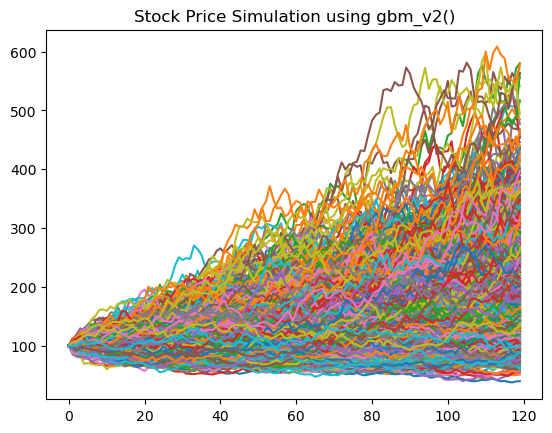

In [8]:
#Stock price simulation as plot
gbm_v1(s_0, n_years, mu, sigma, steps, n_sims).plot(legend=False, title="Stock Price Simulation using gbm_v2()")

You can see that gbm_v1() and gbm_v2() produce the same results^ but gmb_v2() is a bit faster than gbm_v1():

^ *there will always be some variation because of the np.random.normal() process, unless of course you set a seed.*

In [9]:
%timeit gbm_v1(s_0, n_years, mu, sigma, steps, n_sims)
%timeit gbm_v2(s_0, n_years, mu, sigma, steps, n_sims)

7.43 ms ± 779 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.57 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Naturally, futher analysis might:

- Compare the average gbm-implied stock prices across simulations to a closed-form solution (Black Scholes)
- Tune parameters n_steps and n_sims to identify a point of diminishing marginal gain w.r.t. Black Scholes i.e., which combination of n_steps and n_sims is least "computationally expensive" in terms of getting us close enough to the closed-form solution?